<a href="https://colab.research.google.com/github/keith-leung/Celia/blob/master/Queue_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TODO: Debug path()

class SearchNode(object):
    def __init__(self, problem, state, parent=None, action=None, step_cost=0, depth=0):
        self.problem = problem
        self.state = state
        self.parent = parent
        self.action = action
        self.step_cost = step_cost
        self.path_cost = step_cost + (0 if parent is None else parent.path_cost)
        self.path_risk = self.path_cost + problem.heuristic(state) # A*
        self.depth = depth
        self.child_list = []
    def is_goal(self):
        return self.problem.is_goal(self.state)
    def children(self):
        if len(self.child_list) > 0: return self.child_list
        domain = self.problem.domain
        for action, step_cost in domain.valid_actions(self.state):
            new_state = domain.perform_action(self.state, action)
            self.child_list.append(
                SearchNode(self.problem, new_state, self, action, step_cost, depth=self.depth+1))
        return self.child_list
    def path(self):
        if self.parent == None: return []
        return self.parent.path() + [self.action]

if __name__ == "__main__":
  n0 = SearchNode(problem=None, state=0, parent=None, action=None)
  n1 = SearchNode(problem=None, state=1, parent=n0, action="a1")
  n2 = SearchNode(problem=None, state=2, parent=n1, action="a2")
  print(n2.path()) # should be ["a1", "a2"]


AttributeError: ignored

In [ ]:
# TODO: change is_goal so that all multiples of 5 are goals

# TODO A*: Add a default heuristic function (h_UCS) to SearchProblem

class SearchProblem(object):
    def __init__(self, domain, initial_state, is_goal = None):
        if is_goal is None: is_goal = lambda s: False
        #if is_goal is None: is_goal = False
        self.domain = domain
        self.initial_state = initial_state
        self.is_goal = is_goal
        self.heuristic = lambda s: 0
    def root_node(self):
        return SearchNode(self, self.initial_state)

# def is_goal(s):
#   return (s%2 == 0)

if __name__ == "__main__":
  problem = SearchProblem(domain=None, initial_state=0, is_goal=lambda s: s % 5 == 0)
  print(problem.is_goal(5))


True


In [ ]:
False(5)

TypeError: ignored

In [ ]:
# TODO: change path costs so that last node added gets popped
# TODO A*: change priority queue to use risk instead of cost

import numpy as np
from collections import deque

class FIFOFrontier(object):
    def __init__(self):
        self.queue_nodes = deque()
        self.queue_states = set()
    def push(self, node):
        if node.state not in self.queue_states:
            self.queue_nodes.append(node)
            self.queue_states.add(node.state)
    def pop(self):
        node = self.queue_nodes.popleft()
        self.queue_states.remove(node.state)
        return node
    def is_not_empty(self):
        return len(self.queue_nodes) > 0

class PriorityFIFOFrontier(object):
    """
    FIFO queue (for breaking ties) but pops lowest path cost first
    """
    def __init__(self):
        self.queue_nodes = []
        self.queue_states = {}
    def push(self, node):
        if node.state in self.queue_states:
            other_node = self.queue_states[node.state]
            if node.path_risk >= other_node.path_risk: return
            self.queue_nodes.remove(other_node)
            self.queue_states.pop(other_node.state)
        self.queue_states[node.state] = node
        self.queue_nodes.append(node)
    def pop(self):
        idx = np.argmin([node.path_risk for node in self.queue_nodes])
        node = self.queue_nodes.pop(idx)
        self.queue_states.pop(node.state)
        return node
    def is_not_empty(self):
        return len(self.queue_nodes) > 0

if __name__ == "__main__":

  q = PriorityFIFOFrontier()
  n0.path_cost = 10
  n1.path_cost = 3
  n2.path_cost = 7
  for n in [n0, n1, n2]:
    q.push(n)
    print(q.queue_nodes)
  q.pop()
  print(q.queue_nodes)


NameError: ignored

In [ ]:
# TODO: finish the astar_search implementation

def queue_search(frontier, problem):
    explored = set()
    root = problem.root_node()
    frontier.push(root)
    while frontier.is_not_empty():
        node = frontier.pop()
        if node.is_goal(): break
        explored.add(node.state)
        for child in node.children():
            if child.state in explored: continue
            frontier.push(child)
    plan = node.path() if node.is_goal() else []
    return plan

def breadth_first_search(problem):
    return queue_search(FIFOFrontier(), problem)

def uniform_cost_search(problem):
    return queue_search(PriorityFIFOFrontier(), problem)

def a_star_search(problem, heuristic):
    problem.heuristic = heuristic
    return queue_search(PriorityFIFOFrontier(), problem)

In [ ]:
# TODO: debug

class BottleDomain(object):
    def __init__(self, capacities):
        self.capacities = capacities # capacities[b] is maximum capacity for the bth bottle
    def valid_actions(self, state):
        bottles = range(len(state))
        fills = [("fill %d"%b,10*b + 1) for b in bottles]
        empty = [("dump %d"%b,10*b + 1) for b in bottles]
        pours = [("pour %d into %d"%(b1,b2),10*b1+1) for b1 in bottles for b2 in bottles if b1 != b2]
        return fills + empty + pours    
    def perform_action(self, state, action):
        new_state = list(state)
        if action[:4] == "fill":
            b = int(action[5:]) # bottle to fill
            new_state[b] = self.capacities[b]
        if action[:4] == "dump":
            b = int(action[5:]) # bottle to dump
            new_state[b] = 0
        if action[:4] == "pour":
            b1, b2 = map(int, action[5:].split(" into ")) # pour b1 into b2
            amount = min(state[b1], self.capacities[b2] - state[b2])
            new_state[b1] = state[b1] - amount
            new_state[b2] = state[b2] + amount
        return tuple(new_state)

if __name__ == "__main__":

    # Make a domain with two bottles, a 5-liter and 3-liter
    domain = BottleDomain(capacities = (5, 3))

    # Define a search problem with initial and goal states
    # is_goal is a function handle that accepts bottle states as input.
    # it returns True if the state is a goal, False otherwise.
    problem = SearchProblem(domain,
        initial_state = (0, 0),
        # is_goal = lambda s: s == (5, 3)
        # is_goal = lambda s: s[1] == 1)
        # is_goal = lambda s: s == (0, 1)
        is_goal = lambda s: any([l == 1 for l in s])
    )

        
    # Solve the search problem with BFS and validate the plan
    bfs_plan = breadth_first_search(problem)
    plan = uniform_cost_search(problem)
    print(bfs_plan)
    print(plan)
    state = problem.initial_state
    print(state)
    for action in plan:
        print(action)
        state = domain.perform_action(state, action)
        print(state)


AttributeError: ignored

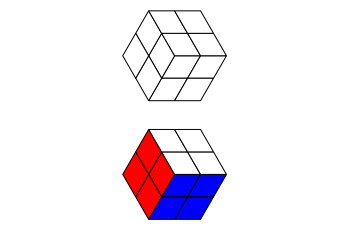

scramble plan:
[2, 0, 0, 0]


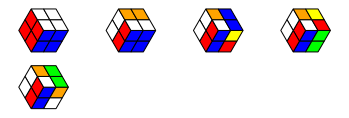

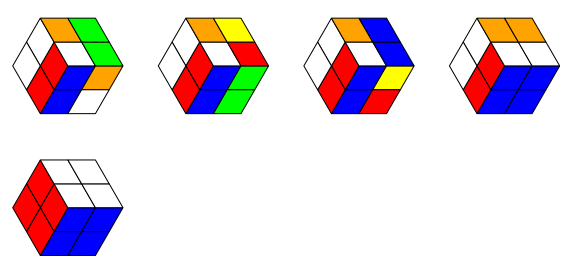

In [ ]:
# TODO: finish implementing the cubie heuristic

"""
2x2x2 rubiks cube
state is a 2x2x2x3 char array
first 3 dimensions are positions on the cube
last dimension is the colors in each of the 3 spatial directions
spatial directions are 0:x, 1:y, 2:z
"""
import numpy as np
import matplotlib.pyplot as pt
import itertools as it
from matplotlib.patches import Polygon

R, G, B, W, Y, O = range(6)
def colorstr(i): return "RGBWYO"[i]
colors = {
    R: (1.,0.,0.), # red
    G: (0.,1.,0.), # green
    B: (0.,0.,1.), # blue
    W: (1.,1.,1.), # white
    Y: (1.,1.,0.), # yellow
    O: (1.,.64,0.), # orange
}

def unhash(state):
    return np.frombuffer(state, dtype=np.byte).reshape((2,2,2,3))
def rehash(state):
    return state.tobytes()
def solved_state():
    solved = np.zeros((2,2,2,3),dtype=np.byte)
    solved[0,:,:,0] = R
    solved[1,:,:,0] = O
    solved[:,0,:,1] = W
    solved[:,1,:,1] = Y
    solved[:,:,1,2] = G
    solved[:,:,0,2] = B
    return rehash(solved)

class RubiksDomain(object):
    def __init__(self):
        pass
    def valid_actions(self, state):
        return [(0,1), (1,1), (2,1)] # which spatial direction to spin, equal step-cost
    def perform_action(self, state, action):
        new_state = unhash(state).copy()
        # rotate cubie positions
        index = [slice(None)]*4
        index[action] = 1
        new_state[tuple(index)] = np.rot90(new_state[tuple(index)], axes=(0,1))
        # rotate cubies
        swap = [d for d in range(3) if d != action]
        new_state[tuple(index[:3])+(swap,)] = new_state[tuple(index[:3])+(swap[::-1],)]
        return rehash(new_state)
    def render(self, ax, state, x0, y0):
        state = unhash(state)
        angles = -np.arange(3) * np.pi * 2 / 3
        axes = np.array([np.cos(angles), np.sin(angles)])
        for d in range(3):
            for a, b in [(0,0),(0,1),(1,0),(1,1)]:
                xy = [a*axes[:,d] + b*axes[:,(d+1) % 3],
                    (a+1)*axes[:,d] + b*axes[:,(d+1) % 3],
                    (a+1)*axes[:,d] + (b+1)*axes[:,(d+1) % 3],
                    a*axes[:,d] + (b+1)*axes[:,(d+1) % 3]]
                xy = [(x+x0, y+y0) for (x,y) in xy]
                c = colors[state[tuple(np.roll((a,b,0),d))+((d+2) % 3,)]]
                ax.add_patch(Polygon(xy, facecolor=c, edgecolor='k'))
    def node_diameter(self):
        return 4.4

domain = RubiksDomain()
def drawcube(state, ax):
    domain.render(ax, state, 0, 0)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.axis("equal")
    ax.axis('off')

if __name__ == "__main__":

    def cubie_heuristic(state):
    
        solved = unhash(solved_state())
        h = [] # list of heuristics for each cubie
        # check each cubie
        for i,j,k in it.product([0,1],repeat=3):
            # solve bfs mini-problem to just place that one cubie at [i,j,k,:]
            cubie_plan = [] # replace this
            h.append(len(cubie_plan))
        return max(h)

    ### examples for slides

    solved = solved_state()
    blank = unhash(solved).copy()
    blank[:] = W
    blank = rehash(blank)
    pt.figure()
    ax = pt.subplot(2,1,1)
    drawcube(blank, ax)
    ax = pt.subplot(2,1,2)
    drawcube(solved, ax)
    pt.show()

    # plan = [0, 1, 0, 2] # bfs
    plan = [2, 0, 0, 0, 1, 2, 1, 0] # decent astar example
    # plan = np.random.choice([0,1,2],(8,)) # random astar

    plan = plan[:4]

    print("scramble plan:")
    print(list(plan))
    state = solved
    drawcube(state, pt.subplot(4,4,1))
    for a,action in enumerate(plan):
        for _ in range(3): # one rotation in opposite orientation
            state = domain.perform_action(state, action)
        drawcube(state, pt.subplot(4,4,a+2))
    pt.show()

    problem = SearchProblem(domain,
        initial_state = state,
        is_goal = lambda s: s == solved)
    plan = a_star_search(problem, heuristic = cubie_heuristic)
    pt.figure(figsize=(10,10))
    drawcube(state, pt.subplot(4,4,1))
    for a,action in enumerate(plan):
        state = domain.perform_action(state, action)
        drawcube(state, pt.subplot(4,4,a+2))
    pt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as pt

WALL, CHARGER, CLEAN, DIRTY = list(range(4))
SIZE = 11

class RoombaDomain:
    def __init__(self):

        # deterministic grid world
        num_rows, num_cols = SIZE, SIZE
        grid = CLEAN*np.ones((num_rows, num_cols), dtype=int)
        grid[SIZE//2, 1:SIZE-1] = WALL
        grid[1:SIZE//2+1,SIZE//2] = WALL
        grid[0,0] = CHARGER
        grid[0,-1] = CHARGER
        grid[-1,SIZE//2] = CHARGER
        max_power = 2*SIZE
        
        self.grid = grid
        self.max_power = max_power

    def pack(self, g, r, c, p):
        return (g.tobytes(), r, c, p)
    def unpack(self, state):
        grid, r, c, p = state
        grid = np.frombuffer(grid, dtype=int).reshape(self.grid.shape).copy()
        return grid, r, c, p

    def initial_state(self):
        positions = list(zip(*np.nonzero(self.grid == CHARGER)))
        # r, c = positions[np.random.randint(len(positions))]
        r, c = 0, 0

        positions = np.random.permutation(list(zip(*np.nonzero(self.grid == CLEAN))))
        grid = self.grid.copy()
        for dirty in range(5): grid[tuple(positions[dirty])] = DIRTY

        # grid = self.grid + (np.random.rand(*self.grid.shape) < .1)*(self.grid == 2)

        return self.pack(grid, r, c, self.max_power)

    def render(self, ax, state, x=0, y=0):
        grid, r, c, p = self.unpack(state)
        num_rows, num_cols = grid.shape
        ax.imshow(grid, cmap='gray', vmin=0, vmax=3, extent=(x-.5,x+num_cols-.5, y+num_rows-.5, y-.5))
        for col in range(num_cols+1): pt.plot([x+ col-.5, x+ col-.5], [y+ -.5, y+ num_rows-.5], 'k-')
        for row in range(num_rows+1): pt.plot([x+ -.5, x+ num_cols-.5], [y+ row-.5, y+ row-.5], 'k-')
        pt.text(c-.25, r+.25, str(p), fontsize=24)
        pt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    def valid_actions(self, state):
        grid, r, c, p = self.unpack(state)
        num_rows, num_cols = grid.shape
        actions = []
        if r > 0 and grid[r-1,c] != WALL: actions.append(((-1, 0), 1))
        if r < num_rows-1 and grid[r+1,c] != WALL: actions.append(((1, 0), 1))
        ### TODO: add code for column (c) boundaries
        if c > 0 and grid[r,c-1] != WALL: actions.append(((0, -1), 1))
        if c < num_cols-1 and grid[r,c+1] != WALL: actions.append(((0, 1), 1))        
        ### TODO: add code to deal with zero power
        if p <= 0: actions = []
        return actions
    
    def perform_action(self, state, action):
        grid, r, c, p = self.unpack(state)
        dr, dc = action # dr, dc = action[0], action[1]
        r, c = r + dr, c + dc
        ### TODO: add code to deal with drainage and recharging
        p -= 1
        if grid[r,c] == CHARGER: p = self.max_power
        ### TODO: add code to deal with cleaning
        if grid[r,c] == DIRTY: grid[r,c] = CLEAN
        new_state = self.pack(grid, r, c, p)
        return new_state

In [ ]:
x=np.ones((2,3))*CLEAN
x[1:]= 0
print(x)
print(np.nonzero(x))
print(list(zip(*np.nonzero(x))))

[[2. 2. 2.]
 [0. 0. 0.]]
(array([0, 0, 0]), array([0, 1, 2]))
[(0, 0), (0, 1), (0, 2)]


bfs_time 0.4995626899999479
astar_time 1.778133992999983
[(1, 0), (1, 0), (1, 0), (1, 0), (-1, 0), (0, 1), (-1, 0), (-1, 0), (-1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, -1), (0, -1), (0, -1), (0, -1), (0, -1)]
[((1, 0), 1), ((0, 1), 1)]


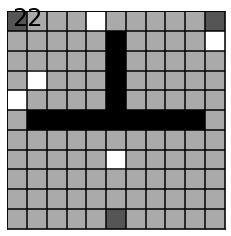

(1, 0)


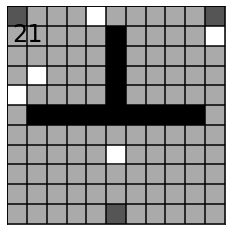

(1, 0)


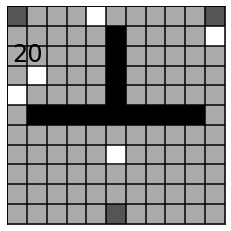

(1, 0)


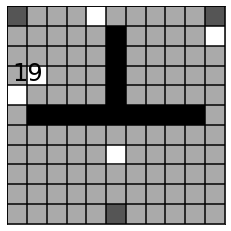

(1, 0)


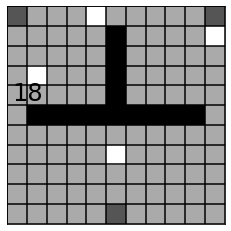

(-1, 0)


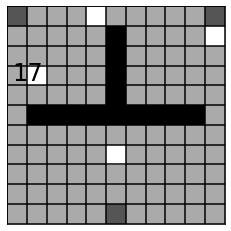

(0, 1)


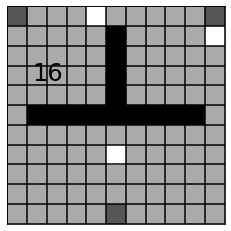

(-1, 0)


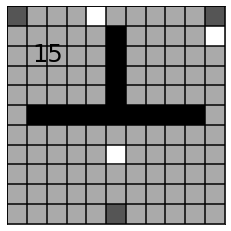

(-1, 0)


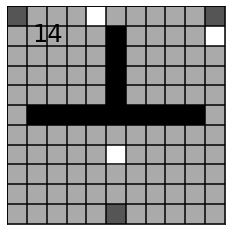

(-1, 0)


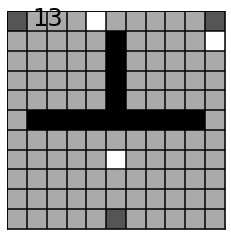

(0, 1)


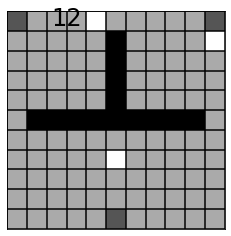

(0, 1)


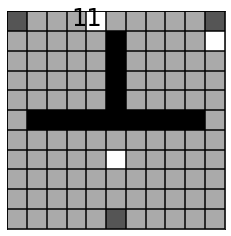

(0, 1)


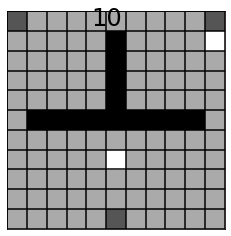

(0, 1)


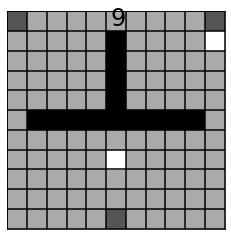

(0, 1)


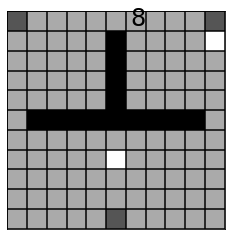

(0, 1)


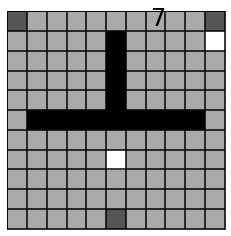

(0, 1)


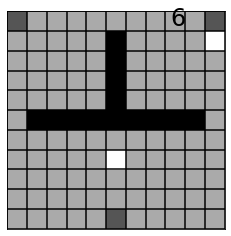

(0, 1)


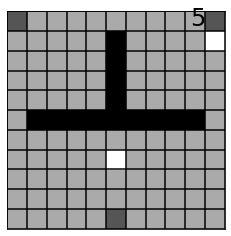

(0, 1)


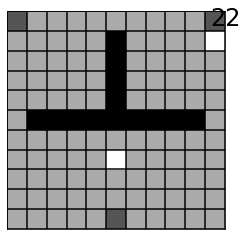

(1, 0)


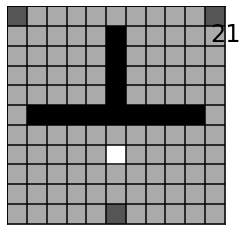

(1, 0)


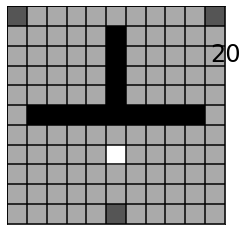

(1, 0)


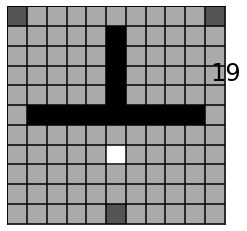

(1, 0)


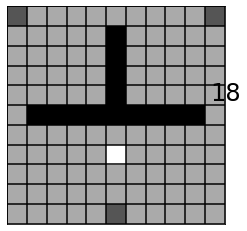

(1, 0)


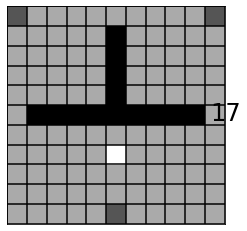

(1, 0)


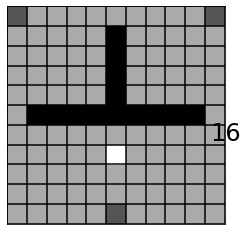

(1, 0)


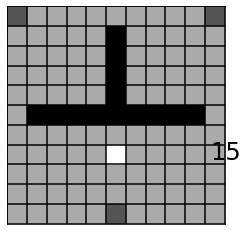

(0, -1)


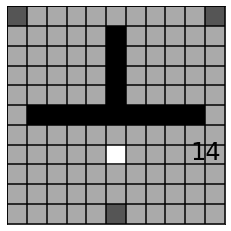

(0, -1)


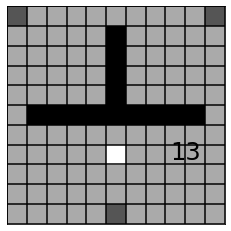

(0, -1)


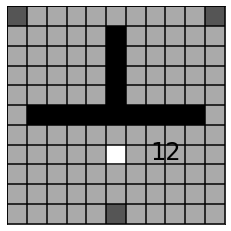

(0, -1)


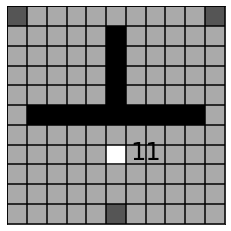

(0, -1)


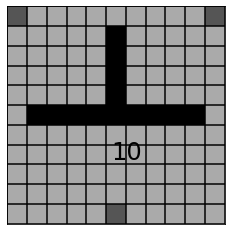

In [ ]:
if __name__ == "__main__":

    domain = RoombaDomain()
    state = domain.initial_state()

    def is_goal(state):
        grid, r, c, p = domain.unpack(state)
        result = (grid != DIRTY).all()
        return result

    def heuristic(state):
        grid, r, c, p = domain.unpack(state)

        dirty = list(zip(*np.nonzero(grid == DIRTY)))
        if len(dirty) == 0: return 0

        dists = [np.fabs(dr-r)+np.fabs(dc-c) for (dr, dc) in dirty]

        # TODO: tighter under-estimate?

        return min(dists)

    from time import perf_counter

    problem = SearchProblem(domain, domain.initial_state(), is_goal)

    start = perf_counter()
    plan = breadth_first_search(problem)
    bfs_time = perf_counter() - start
    print("bfs_time", bfs_time)

    # start = perf_counter()
    # plan, _, _ = uniform_cost_search(problem)
    # ucs_time = perf_counter() - start
    # print("ucs_time", ucs_time)

    start = perf_counter()
    plan = a_star_search(problem, heuristic)
    astar_time = perf_counter() - start
    print("astar_time", astar_time)
    print(plan)

    state = problem.initial_state
    pt.ion()
    pt.figure()
    domain.render(pt.gca(), state)
    print(domain.valid_actions(state))
    pt.pause(.1)
    pt.show()
    for action in plan:
        print(action)
        state = domain.perform_action(state, action)
        pt.cla()
        domain.render(pt.gca(), state)
        pt.pause(.1)


In [ ]:
fig = pt.figure()
state = problem.initial_state
states = [state]
for a in range(len(plan)):
  states.append(domain.perform_action(states[-1], plan[a]))

def drawframe(n):
  domain.render(pt.gca(), states[n])

from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(plan), interval=5, blit=False)

from IPython.display import HTML
HTML(anim.to_html5_video())